# Análisis de una Armadura Plana con el Método de Elementos Finitos (MEF)
 
Este notebook demuestra cómo analizar una armadura plana (2D) utilizando el MEF. El análisis de armaduras extiende los conceptos de los elementos de barra al espacio bidimensional.

Características clave:
- Cada nodo tiene **dos grados de libertad**: desplazamiento en 'x' ($u$) y desplazamiento en 'y' ($v$).
- La matriz de rigidez de cada elemento se calcula primero en un **sistema de coordenadas local** (a lo largo del eje de la barra) y luego se **transforma al sistema de coordenadas global** mediante una matriz de rotación.


**Problema:**
 
El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza la armadura plana mostrada a continuación. Se busca determinar los desplazamientos en el nodo 1, las fuerzas de reacción en los apoyos y las fuerzas y esfuerzos internos en cada barra.

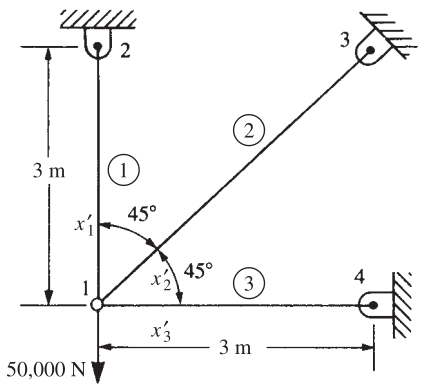

In [5]:
from mnspy import Nodo, Armadura, Ensamble

### Paso 1: Definición de los Nodos

Se crean los nodos del sistema, especificando sus coordenadas (x, y) y sus condiciones de frontera para ambos grados de libertad.
- `{'x': True, 'y': True}`: El nodo es libre para moverse en ambas direcciones.
- `{'x': False, 'y': False}`: El nodo está completamente restringido (apoyo fijo).

In [6]:
n_1= Nodo('1', 0, 0, grados_libertad={'x': True,'y': True})
n_2= Nodo('2', 0, 3, grados_libertad={'x': False,'y': False})
n_3= Nodo('3', 3, 3, grados_libertad={'x': False,'y': False})
n_4= Nodo('4', 3, 0, grados_libertad={'x': False,'y': False})

### Paso 2: Definición de los Elementos (Armadura)

Se crean los elementos tipo `Armadura`, especificando su ID, los nodos que conecta, el área de su sección transversal `A` y su Módulo de Young `E`. La clase calcula automáticamente la longitud y el ángulo de cada barra a partir de las coordenadas de sus nodos.

In [7]:
e_1 = Armadura('1',n_1,n_2, A=6E-4, E=200E9)
e_2 = Armadura('2',n_1,n_3, A=6E-4, E=200E9)
e_3 = Armadura('3',n_1,n_4, A=6E-4, E=200E9)

### Paso 3: Aplicación de Cargas Externas
 
Se aplica la fuerza externa de $50,000\,N$ en el nodo $1$, en la dirección 'y' (hacia abajo).

In [8]:
n_1.agregar_fuerza_externa(-50000,'y')

### Paso 4: Matrices de Rigidez de los Elementos

Cada elemento `Armadura` tiene una matriz de rigidez de 4x4 en el sistema de coordenadas global.

In [9]:
e_1

Armadura: 1

In [10]:
e_2

Armadura: 2

In [11]:
e_3

Armadura: 3

### Paso 5: Ensamble del Sistema y Diagrama

Se crea un objeto `Ensamble` que agrupa todos los elementos.

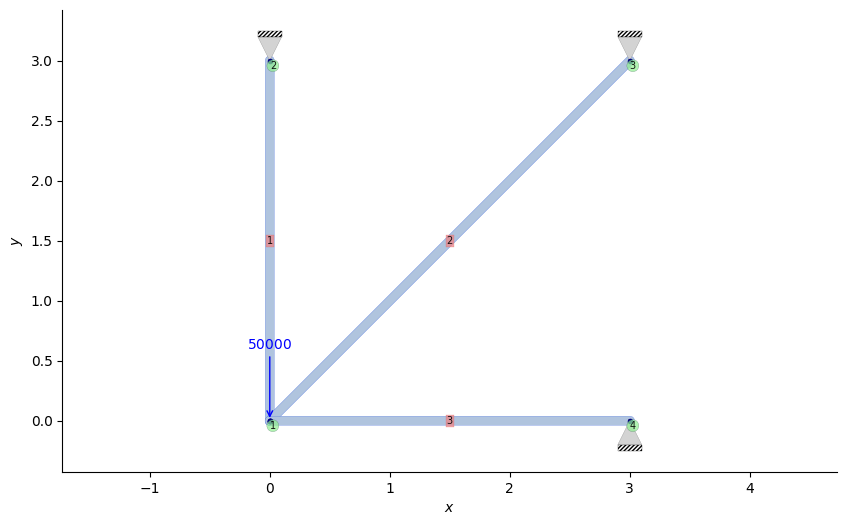

In [12]:
mg = Ensamble([e_1,e_2, e_3])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global

El ensamble construye la matriz de rigidez global del sistema completo.

In [13]:
mg

### Paso 7: Matriz de Rigidez Global Reducida

Esta es la matriz de rigidez que corresponde únicamente a los grados de libertad desconocidos (desplazamientos 'x' e 'y' del nodo $1$).

In [14]:
mg.matriz_global_reducida()

<IPython.core.display.Math object>

### Paso 8: Solución del Sistema

Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos desconocidos y luego se calculan las fuerzas de reacción en los apoyos.

In [15]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos calculados para el nodo 1.
mg.solucion()

Desplazamientos,Reacciones
$\color{blue}u_{1}=0.0002588834765$,$\cancel{F_{1x}}$
$\color{blue}v_{1}=-0.0009911165235$,$\cancel{F_{1y}}$
$u_{2}=0$,$\color{blue}F_{2x}=0$
$v_{2}=0$,$\color{blue}F_{2y}=39644.66094$
$u_{3}=0$,$\color{blue}F_{3x}=10355.33906$
$v_{3}=0$,$\color{blue}F_{3y}=10355.33906$
$u_{4}=0$,$\color{blue}F_{4x}=-10355.33906$
$v_{4}=0$,$\color{blue}F_{4y}=0$


In [16]:
# Al mostrar el objeto `Ensamble` de nuevo, se puede ver el estado completo del sistema, incluyendo los desplazamientos y las fuerzas de reacción calculadas en cada nodo.
mg

### Paso 9: Post-procesamiento
Una vez conocidos los desplazamientos nodales, se pueden calcular las fuerzas, esfuerzos y la forma deformada de la estructura.
#### Esfuerzos y Fuerzas Internas 

In [18]:
e_1.esfuerzo()

,Esfuerzo
$\sigma^{(1)}$,6.60744e+07


In [19]:
e_2.esfuerzo()

,Esfuerzo
$\sigma^{(2)}$,2.44078e+07


In [20]:
e_3.esfuerzo()

,Esfuerzo
$\sigma^{(3)}$,-1.72589e+07


In [21]:
e_1.fuerzas_internas()

,Fuerzas internas
$f^{(1)}_{1x}$,0
$f^{(1)}_{1y}$,-39644.7
$f^{(1)}_{2x}$,0
$f^{(1)}_{2y}$,39644.7


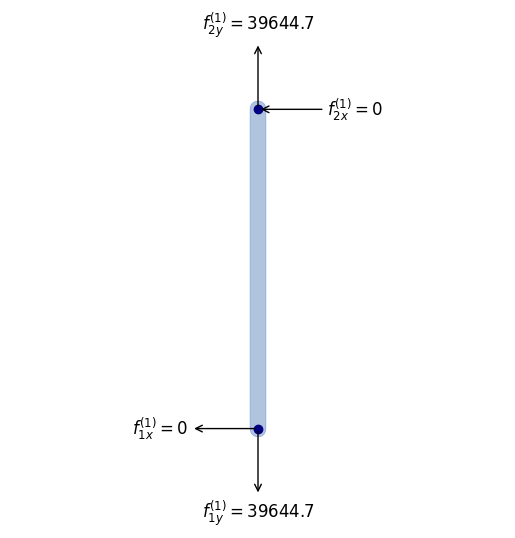

In [22]:
e_1.diagrama_fuerzas_internas()

In [23]:
e_1.fuerzas_internas_local()

,Fuerzas internas local
$f^{\prime(1)}_{1x}$,-39644.7
$f^{\prime(1)}_{2x}$,39644.7


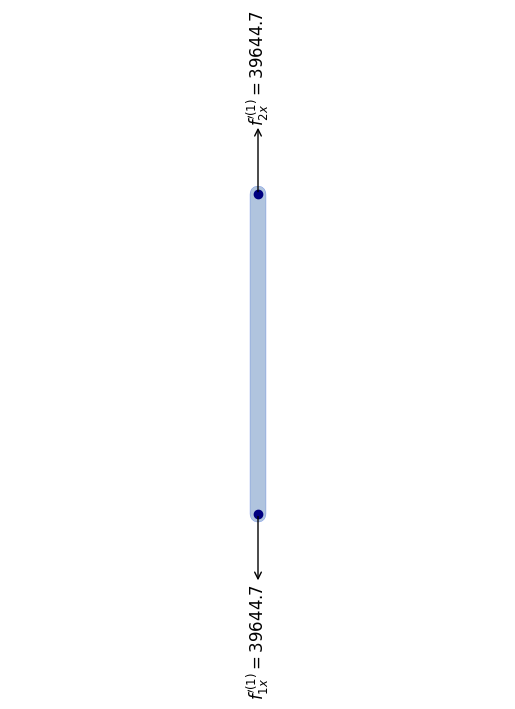

In [24]:
e_1.diagrama_fuerzas_internas_local()

In [25]:
e_2.fuerzas_internas()

,Fuerzas internas
$f^{(2)}_{1x}$,-10355.3
$f^{(2)}_{1y}$,-10355.3
$f^{(2)}_{3x}$,10355.3
$f^{(2)}_{3y}$,10355.3


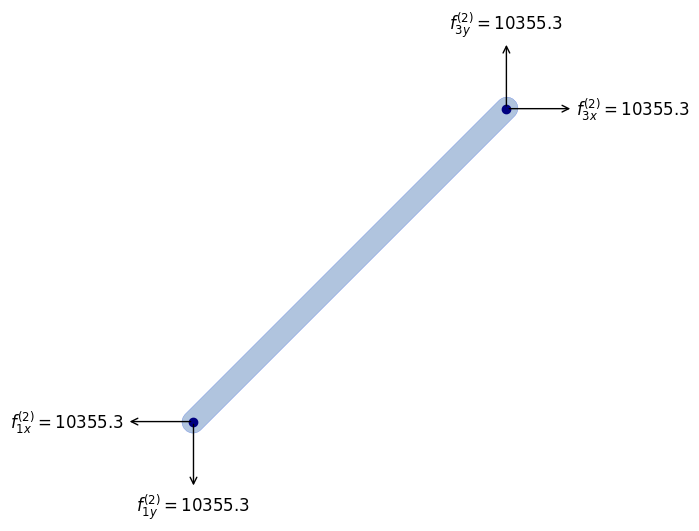

In [26]:
e_2.diagrama_fuerzas_internas()

In [27]:
e_2.fuerzas_internas_local()

,Fuerzas internas local
$f^{\prime(2)}_{1x}$,-14644.7
$f^{\prime(2)}_{3x}$,14644.7


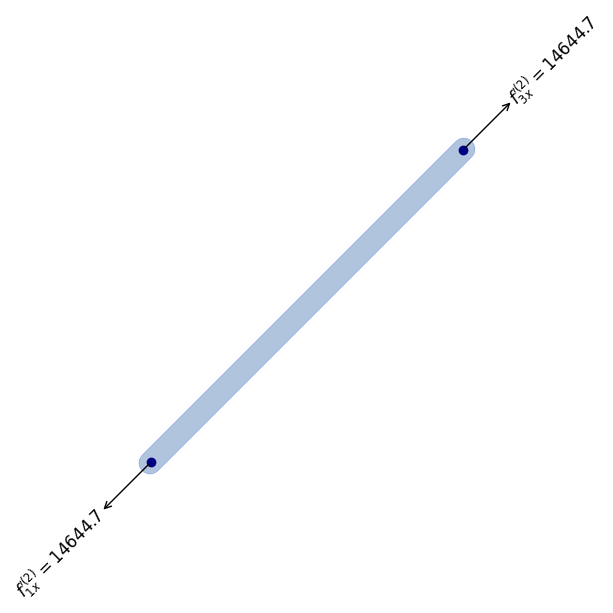

In [28]:
e_2.diagrama_fuerzas_internas_local()

In [29]:
e_3.fuerzas_internas()

,Fuerzas internas
$f^{(3)}_{1x}$,10355.3
$f^{(3)}_{1y}$,0
$f^{(3)}_{4x}$,-10355.3
$f^{(3)}_{4y}$,0


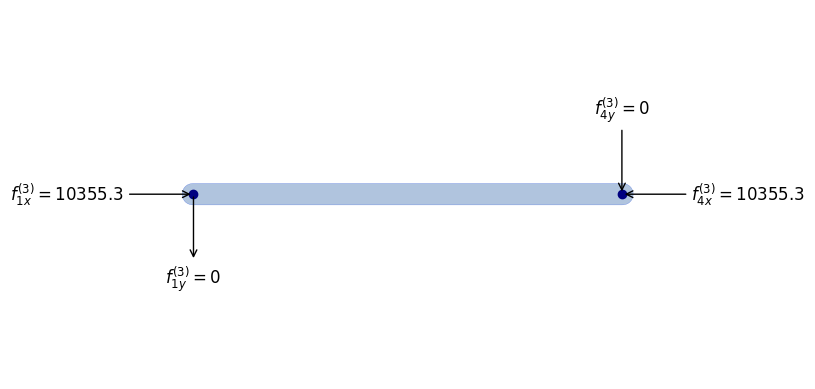

In [30]:
e_3.diagrama_fuerzas_internas()

In [31]:
e_3.fuerzas_internas_local()

,Fuerzas internas local
$f^{\prime(3)}_{1x}$,10355.3
$f^{\prime(3)}_{4x}$,-10355.3


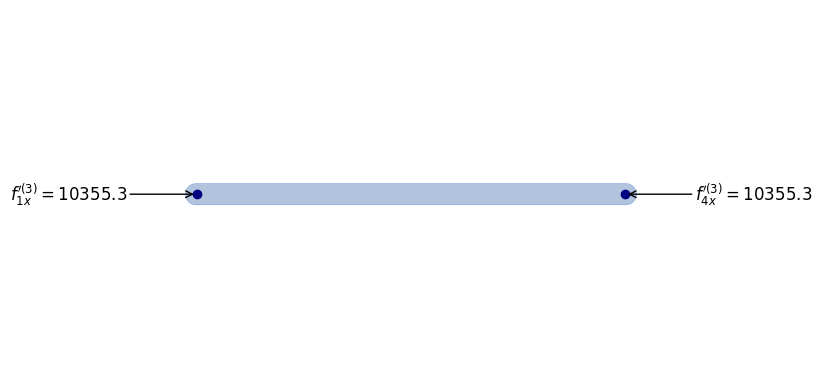

In [32]:
e_3.diagrama_fuerzas_internas_local()

In [33]:
e_1.fuerza()

,Fuerza
$f^{(1)}$,39644.7


In [34]:
e_2.fuerza()

,Fuerza
$f^{(2)}$,14644.7


In [35]:
e_3.fuerza()

,Fuerza
$f^{(3)}$,-10355.3


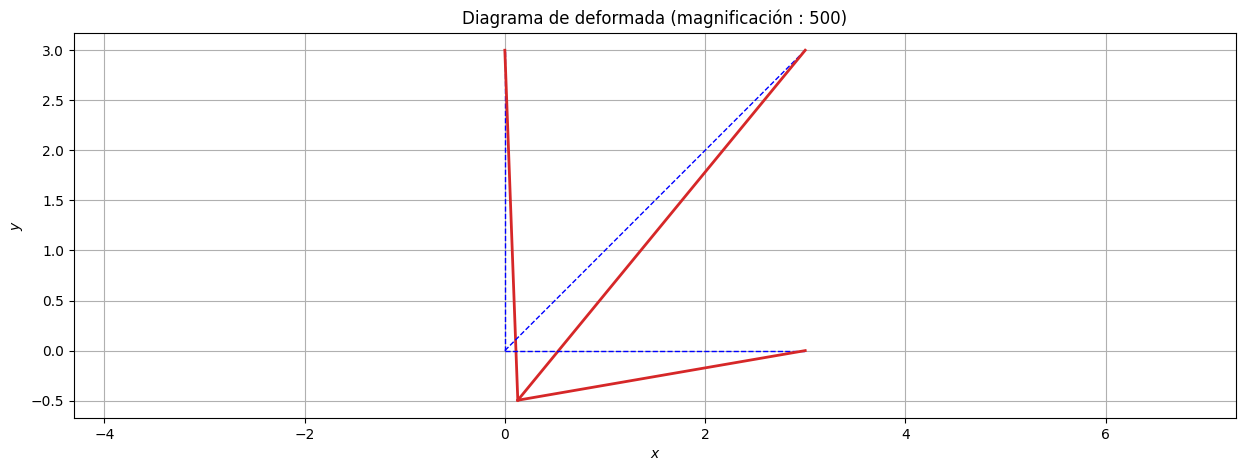

In [36]:
mg.deformada(magnificacion=500)